# TP Numérique - Étude des Orbitales Moléculaires et Atomiques
Ce notebook explore les orbitales atomiques et moléculaires à travers des calculs et des visualisations.

## Objectifs :
1. Tracer les fonctions radiales des orbitales atomiques (1s, 2s, etc.).
2. Étudier les densités de probabilité radiales des orbitales atomiques.
3. Calculer et afficher les orbitales moléculaires liante et antiliante le long de l'axe de liaison.

## Partie 1 : Fonctions radiales des orbitales atomiques

Les fonctions radiales décrivent la variation des orbitales atomiques en fonction de la distance $r$ au noyau. Voici les expressions analytiques des fonctions étudiées :
- $R_{10}(r)$ : Fonction radiale de l'orbitale 1s
- $R_{20}(r)$ : Fonction radiale de l'orbitale 2s
- $R_{21}(r)$ : Fonction radiale de l'orbitale 2p


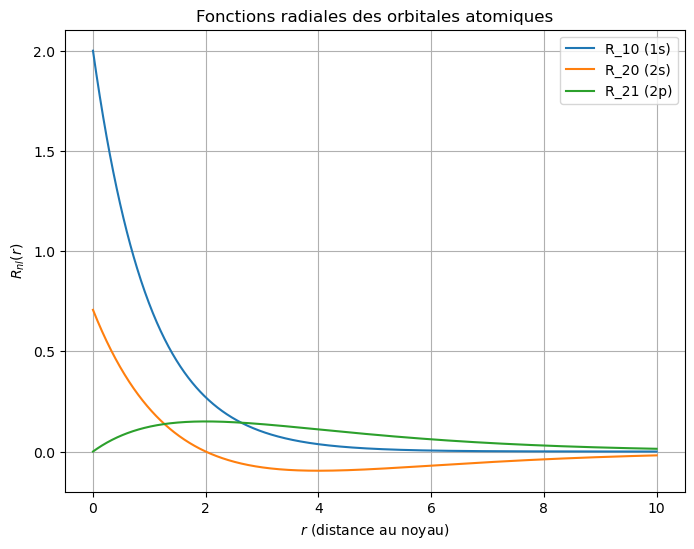

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Bohr
a0 = 1  # Unité simplifiée

# Fonctions radiales normalisées
def R10(r):
    return (1 / a0)**1.5 * 2 * np.exp(-r / a0)

def R20(r):
    return (1 / a0)**1.5 * (1 / (2 * np.sqrt(2))) * (2 - r / a0) * np.exp(-r / (2 * a0))

def R21(r):
    return (1 / a0)**1.5 * (1 / (2 * np.sqrt(6))) * (r / a0) * np.exp(-r / (2 * a0))

# Tracé des fonctions radiales
r_vals = np.linspace(0, 10, 1000)
plt.figure(figsize=(8, 6))
plt.plot(r_vals, R10(r_vals), label='R_10 (1s)')
plt.plot(r_vals, R20(r_vals), label='R_20 (2s)')
plt.plot(r_vals, R21(r_vals), label='R_21 (2p)')
plt.title('Fonctions radiales des orbitales atomiques')
plt.xlabel('$r$ (distance au noyau)')
plt.ylabel('$R_{nl}(r)$')
plt.legend()
plt.grid()
plt.show()

## Partie 2 : Densité de probabilité radiale

La densité de probabilité radiale est définie comme :
$$
P_{nl}(r) = r^2 |R_{nl}(r)|^2
$$
Nous allons tracer cette densité pour les orbitales 1s, 2s et 3s, puis intégrer la densité sur différentes zones pour étudier la probabilité de présence en fonction de $r$.

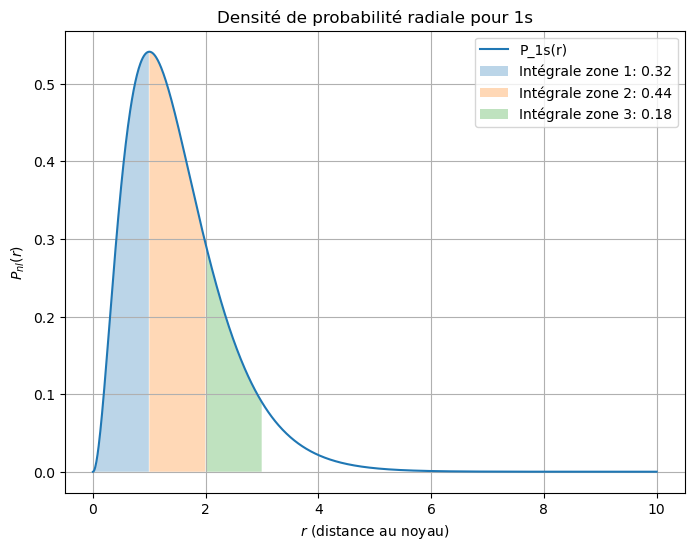

In [2]:
from scipy.integrate import quad

# Fonction de densité radiale
def density_radial(r, Rnl):
    return r**2 * (Rnl(r))**2

# Tracé pour 1s
dens_1s = [density_radial(r, R10) for r in r_vals]
integrals_1s = [quad(lambda r: density_radial(r, R10), start, start + 1)[0] for start in range(3)]

plt.figure(figsize=(8, 6))
plt.plot(r_vals, dens_1s, label='P_1s(r)')
for i, integral in enumerate(integrals_1s):
    plt.fill_between(r_vals[i * 100:(i + 1) * 100], 0, dens_1s[i * 100:(i + 1) * 100], alpha=0.3,
                     label=f'Intégrale zone {i + 1}: {integral:.2f}')

plt.title('Densité de probabilité radiale pour 1s')
plt.xlabel('$r$ (distance au noyau)')
plt.ylabel('$P_{nl}(r)$')
plt.legend()
plt.grid()
plt.show()

## Partie 3 : Orbitales moléculaires liante et antiliante

Les orbitales moléculaires sont définies comme suit :
- **Orbitale liante** : $\psi_{\text{liante}}(z) = R_{10}(r_1) + R_{10}(r_2)$
- **Orbitale antiliante** : $\psi_{\text{antiliante}}(z) = R_{10}(r_1) - R_{10}(r_2)$
où $r_1$ et $r_2$ sont les distances des électrons aux noyaux positionnés à $z = -1$ et $z = +1$.

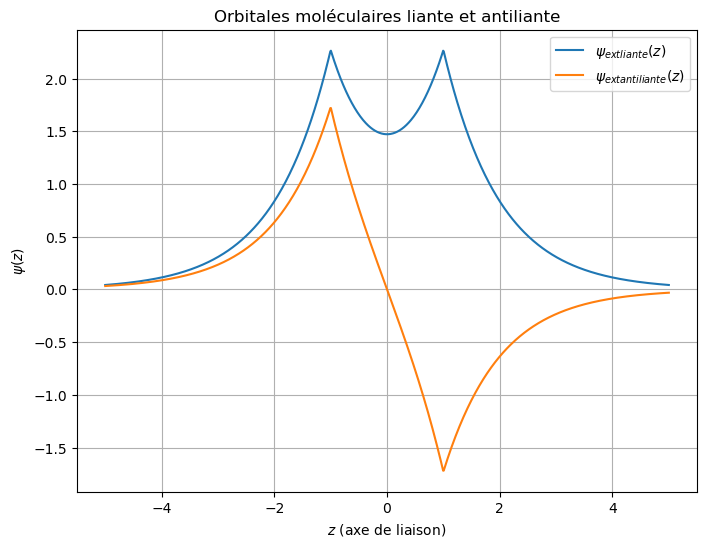

In [6]:
# Fonctions des orbitales moléculaires
def psi_liante(z):
    r1 = np.sqrt((z + 1)**2)
    r2 = np.sqrt((z - 1)**2)
    return R10(r1) + R10(r2)

def psi_antiliante(z):
    r1 = np.sqrt((z + 1)**2)
    r2 = np.sqrt((z - 1)**2)
    return R10(r1) - R10(r2)

# Calcul des orbitales
z_vals = np.linspace(-5, 5, 1000)
psi_liante_vals = np.array([psi_liante(z) for z in z_vals])
psi_antiliante_vals = np.array([psi_antiliante(z) for z in z_vals])

# Tracé
plt.figure(figsize=(8, 6))
plt.plot(z_vals, psi_liante_vals, label='$\psi_{\text{liante}}(z)$')
plt.plot(z_vals, psi_antiliante_vals, label='$\psi_{\text{antiliante}}(z)$')
plt.title('Orbitales moléculaires liante et antiliante')
plt.xlabel('$z$ (axe de liaison)')
plt.ylabel('$\psi(z)$')
plt.legend()
plt.grid()
plt.show()

## Partie 4 : Orbitales moléculaires en 3D

### Méthodologie

1. Générer aléatoirement 10 000 points dans une boîte de dimensions $2 \times 2 \times 2$ centrée sur l'origine.
2. Calculer la valeur de l'orbitale moléculaire (liante ou antiliante) en chaque point.
3. Colorer les points :
   - Rouge pour les valeurs positives
   - Bleu pour les valeurs négatives
4. Représenter ces points dans un graphique 3D.

<IPython.core.display.Javascript object>


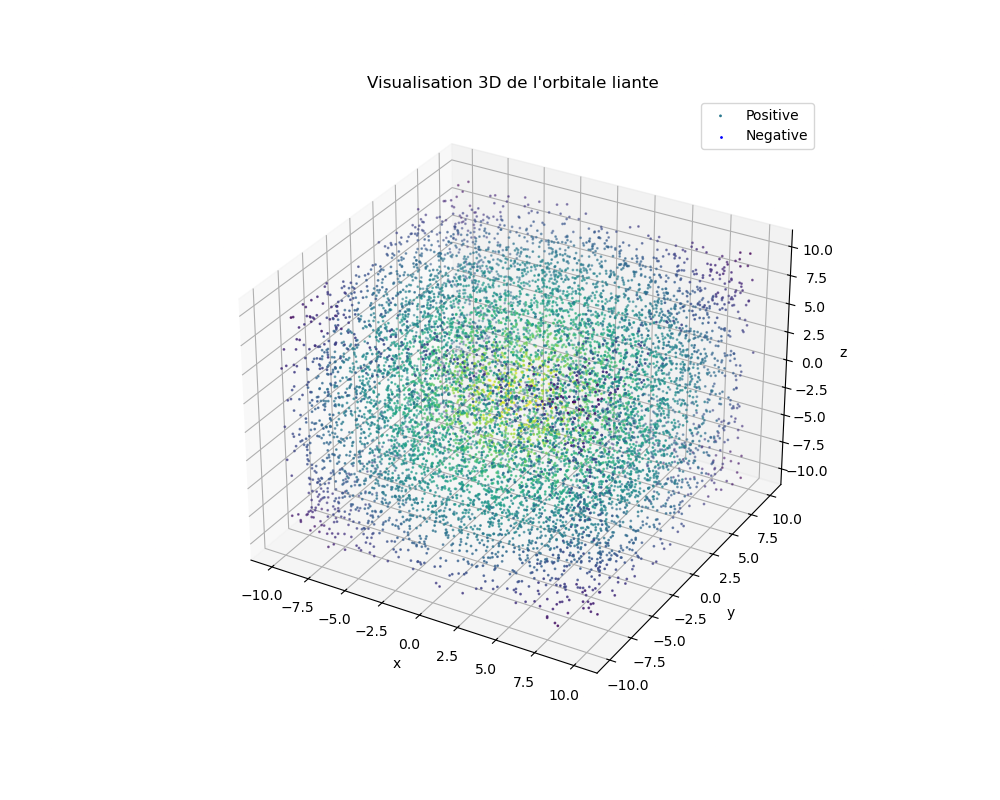

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Constante de Bohr et fonctions radiales
a0 = 1  # Simplifié
def R10(r):
    return (1 / a0)**1.5 * 2 * np.exp(-r / a0)

# Fonctions orbitales moléculaires
def psi_liante(x, y, z):
    r1 = np.sqrt((x + 1)**2 + y**2 + z**2)
    r2 = np.sqrt((x - 1)**2 + y**2 + z**2)
    return R10(r1) + R10(r2)

def psi_antiliante(x, y, z):
    r1 = np.sqrt((x + 1)**2 + y**2 + z**2)
    r2 = np.sqrt((x - 1)**2 + y**2 + z**2)
    return R10(r1) - R10(r2)

# Génération de points aléatoires
np.random.seed(42)
points = np.random.uniform(-1, 1, size=(10000, 3)) * 10

# Calcul des valeurs de l'orbitale liante
values_liante = np.array([psi_liante(x, y, z) for x, y, z in points])
abs_values_liante = np.log(np.abs(values_liante))

# Séparation des points selon la valeur
positive_points = points[values_liante > 0]
negative_points = points[values_liante <= 0]

# Tracé pour l'orbitale liante
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positive_points[:, 0], positive_points[:, 1], positive_points[:, 2], c=abs_values_liante, cmap='viridis', s=1, label='Positive')
ax.scatter(negative_points[:, 0], negative_points[:, 1], negative_points[:, 2], c='blue', s=1, label='Negative')
ax.set_title("Visualisation 3D de l'orbitale liante")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


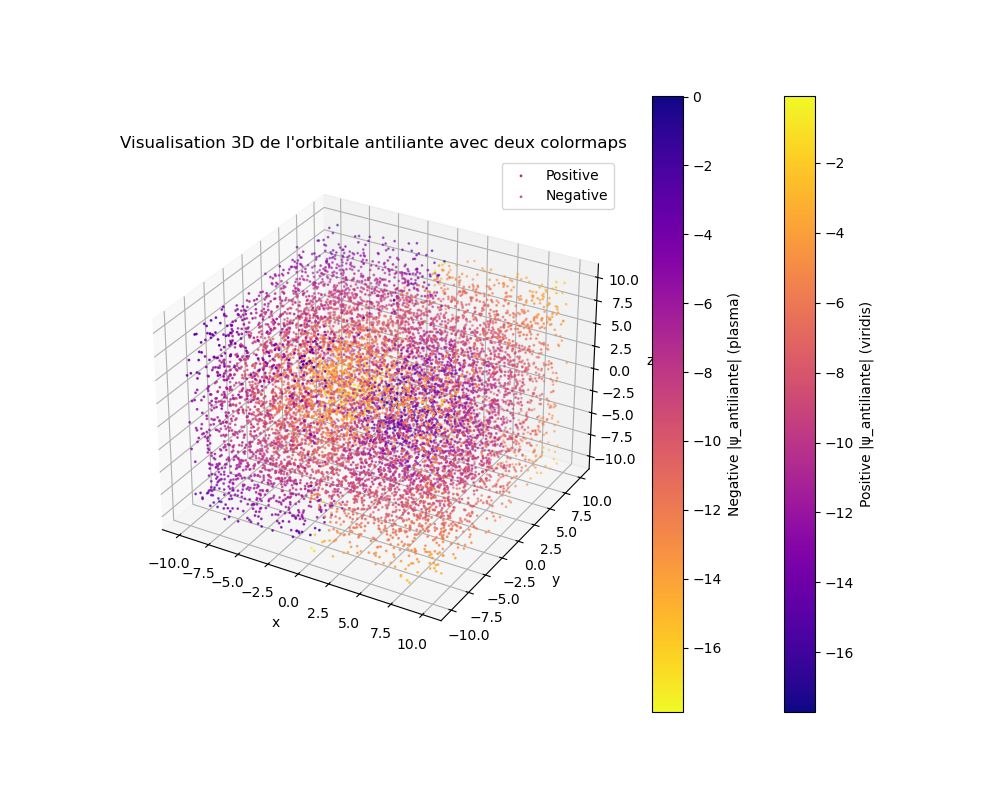

In [10]:
# Calcul des valeurs de l'orbitale antiliante
values_antiliante = np.array([psi_antiliante(x, y, z) for x, y, z in points])

# Séparation des points selon la valeur
positive_points_antiliante = points[values_antiliante > 0]
negative_points_antiliante = points[values_antiliante <= 0]

# Valeurs absolues pour la colormap
positive_values = np.log(values_antiliante[values_antiliante > 0])
negative_values = np.log(np.abs(values_antiliante[values_antiliante <= 0]))  # Utiliser la valeur absolue pour une colormap continue

# Tracé pour l'orbitale antiliante avec deux colormaps
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Points positifs avec 'viridis'
pos_scatter = ax.scatter(
    positive_points_antiliante[:, 0], 
    positive_points_antiliante[:, 1], 
    positive_points_antiliante[:, 2], 
    c=positive_values, cmap='plasma', s=1, label='Positive'
)

# Points négatifs avec 'plasma'
neg_scatter = ax.scatter(
    negative_points_antiliante[:, 0], 
    negative_points_antiliante[:, 1], 
    negative_points_antiliante[:, 2], 
    c=negative_values, cmap='plasma_r', s=1, label='Negative'
)

# Ajouter les barres de couleur pour chaque colormap
plt.colorbar(pos_scatter, ax=ax, label="Positive |ψ_antiliante| (viridis)")
plt.colorbar(neg_scatter, ax=ax, label="Negative |ψ_antiliante| (plasma)")

# Configuration des axes
ax.set_title("Visualisation 3D de l'orbitale antiliante avec deux colormaps")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()


<IPython.core.display.Javascript object>


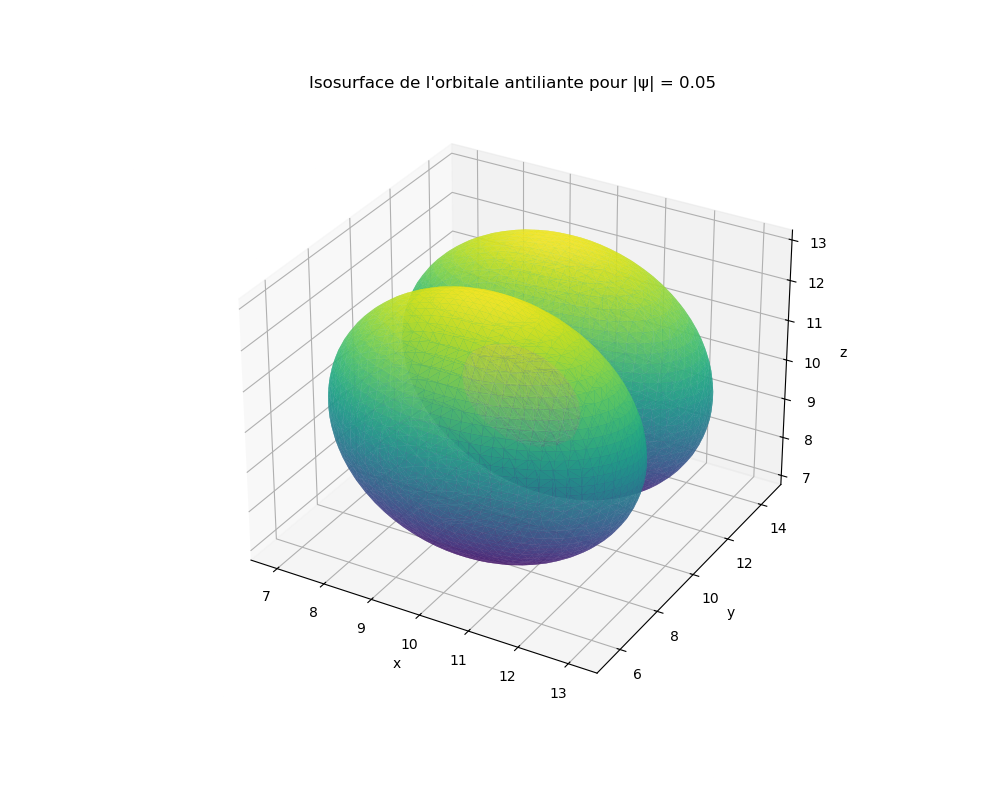

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes

# Constante de Bohr et fonctions radiales
a0 = 1  # Simplifié
def R10(r):
    return (1 / a0)**1.5 * 2 * np.exp(-r / a0)

# Fonction d'onde antiliante
def psi_antiliante(x, y, z):
    r1 = np.sqrt((x + 1)**2 + y**2 + z**2)
    r2 = np.sqrt((x - 1)**2 + y**2 + z**2)
    return R10(r1) - R10(r2)

# Définir une grille régulière dans l'espace
x = np.linspace(-1, 1, 100) * 10  # Étendue de la boîte [-2, 2]
y = np.linspace(-1, 1, 100) * 10
z = np.linspace(-1, 1, 100) * 10
X, Y, Z = np.meshgrid(x, y, z)

# Calculer les valeurs de l'orbitale sur la grille
values = np.abs(psi_antiliante(X, Y, Z))

# Extraire une isosurface pour |ψ| = 0.05
iso_value = 0.05
verts, faces, _, _ = marching_cubes(values, level=iso_value, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))

# Tracé de l'isosurface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(
    verts[:, 0], verts[:, 1], faces, verts[:, 2],
    cmap='viridis', lw=1, alpha=0.8
)
ax.set_title(f"Isosurface de l'orbitale antiliante pour |ψ| = {iso_value}")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
